In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib

In [2]:
directory = [i for i in os.listdir() if i[-4:] == ".csv" and ("Master" not in i)]
directory

['Cape Town WWise_2021-12-07-11-36-18.csv',
 'Cape Town WWise_2022-01-21-11-37-24.csv',
 'Cape Town WWise_2022-03-07-08-45-38.csv',
 'C_TEM2 MLV A UPS kWh Log 20220308.csv',
 'C_TEM2 MLV B UPS kWh Log 20220208.csv']

In [3]:
frames = []

for file in directory[:3]:
    try:    
        new_frame = pd.read_csv(file, index_col = "Timestamp", parse_dates = True)
    except:
        new_frame = pd.read_csv(file, delimiter = ";", index_col = "Timestamp", parse_dates = True)
        
    frames.append(new_frame)
    print (file, new_frame.index[0], new_frame.index[-1])
    
    
new_frame = pd.read_csv('C_TEM2 MLV A UPS kWh Log 20220308.csv', encoding= 'unicode_escape', parse_dates = True)
new_frame["Timestamp"] = pd.to_datetime(new_frame["Time stamp"])
new_frame.index = new_frame["Timestamp"]
new_frame.sort_index(inplace = True)
new_frame.drop(["Timestamp", "Time stamp"], inplace = True, axis = 1)
new_frame["Value"] = new_frame["Value"].replace({",": "."}, regex=True)
new_frame["Value"] = new_frame["Value"].replace({"\xa0": ""}, regex=True)
new_frame["Value"] = new_frame["Value"].astype(float)
new_frame.rename(columns={'Value':'C_TEM2 MLV A UPS kWh Log'}, inplace=True)
frames.append(new_frame)

new_frame = pd.read_csv('C_TEM2 MLV B UPS kWh Log 20220208.csv', delimiter = ";", encoding= 'unicode_escape', parse_dates = True)
new_frame["Timestamp"] = pd.to_datetime(new_frame["Time stamp"])
new_frame.index = new_frame["Timestamp"]
new_frame.sort_index(inplace = True)
new_frame.drop(["Timestamp", "Time stamp"], inplace = True, axis = 1)
new_frame["Value"] = new_frame["Value"].replace({",": "."}, regex=True)
new_frame["Value"] = new_frame["Value"].replace({"\xa0": ""}, regex=True)
new_frame["Value"] = new_frame["Value"].astype(float)
new_frame.rename(columns={'Value':'C_TEM2 MLV B UPS kWh Log'}, inplace=True)
frames.append(new_frame)

C:\Users\jarry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Cape Town WWise_2021-12-07-11-36-18.csv 2021-01-01 00:15:00 2021-12-07 11:30:00
Cape Town WWise_2022-01-21-11-37-24.csv 2021-12-01 00:15:00 2022-01-01 00:00:00
Cape Town WWise_2022-03-07-08-45-38.csv 2022-01-01 00:15:00 2022-03-07 08:45:00


In [4]:
for frame in frames:
    print (frame.index)

DatetimeIndex(['2021-01-01 00:15:00', '2021-01-01 00:30:00',
               '2021-01-01 00:45:00', '2021-01-01 01:00:00',
               '2021-01-01 01:15:00', '2021-01-01 01:30:00',
               '2021-01-01 01:45:00', '2021-01-01 02:00:00',
               '2021-01-01 02:15:00', '2021-01-01 02:30:00',
               ...
               '2021-12-07 09:15:00', '2021-12-07 09:30:00',
               '2021-12-07 09:45:00', '2021-12-07 10:00:00',
               '2021-12-07 10:15:00', '2021-12-07 10:30:00',
               '2021-12-07 10:45:00', '2021-12-07 11:00:00',
               '2021-12-07 11:15:00', '2021-12-07 11:30:00'],
              dtype='datetime64[ns]', name='Timestamp', length=33038, freq=None)
DatetimeIndex(['2021-12-01 00:15:00', '2021-12-01 00:30:00',
               '2021-12-01 00:45:00', '2021-12-01 01:00:00',
               '2021-12-01 01:15:00', '2021-12-01 01:30:00',
               '2021-12-01 01:45:00', '2021-12-01 02:00:00',
               '2021-12-01 02:15:00', '2021-1

<AxesSubplot:xlabel='Timestamp'>

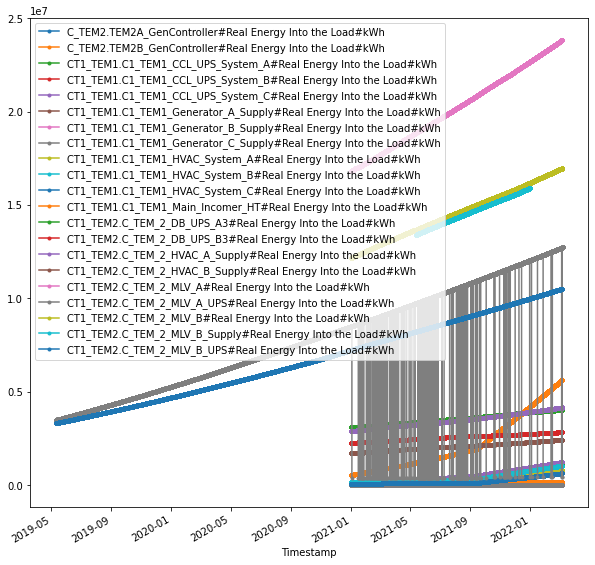

In [5]:
columns_list = []
for frame in frames:    
    for column in frame.columns:
        if column in columns_list:
            pass
        else:
            if column != "Events" and column != "Comment" and column != "User" and ("Old" not in column):
                columns_list.append(column)

#     os.remove(os.path.join(datadir, file))

new_frame = pd.DataFrame()
for column in columns_list:
    new_column = pd.DataFrame()
    for frame in frames:
        try:
            new_column = pd.concat([new_column, frame[column]])
            new_column.sort_index(inplace = True)
#             print (new_column.index[-1])
        except:
            pass

    new_column = new_column[~new_column.index.duplicated(keep='first')]
#     print(new_column.index[-1])
    new_frame = pd.concat([new_frame, new_column], axis=1)
#     print (new_frame.index[-1])
#     print()

new_column = new_column[~new_column.index.duplicated(keep='first')]
new_frame.columns = columns_list
new_frame.replace({",": "."}, regex=True, inplace=True)
new_frame = new_frame.astype(float).copy()
new_frame.sort_index(inplace = True)

new_frame["CT1_TEM2.C_TEM_2_MLV_A_UPS#Real Energy Into the Load#kWh"] = new_frame[["C_TEM2 MLV A UPS kWh Log","CT1_TEM2.C_TEM_2_MLV_A_UPS#Real Energy Into the Load#kWh"]].max(axis = 1)
new_frame["CT1_TEM2.C_TEM_2_MLV_B_UPS#Real Energy Into the Load#kWh"] = new_frame[["C_TEM2 MLV B UPS kWh Log","CT1_TEM2.C_TEM_2_MLV_B_UPS#Real Energy Into the Load#kWh"]].max(axis = 1)
new_frame["CT1_TEM2.C_TEM_2_MLV_B#Real Energy Into the Load#kWh"] = new_frame[["CT1_TEM2.C_TEM_2_MLV_B#Real Energy Into the Load#kWh","CT1_TEM2.C_TEM_2_MLV_B_Supply#Real Energy Into the Load#kWh"]].max(axis = 1)

new_frame.drop('C_TEM2 MLV A UPS kWh Log', axis = 1, inplace = True)
new_frame.drop('C_TEM2 MLV B UPS kWh Log', axis = 1, inplace = True)


new_frame["Timestamp"] = new_frame.index
new_frame.reset_index(inplace = True, drop = True)



new_frame.to_csv(os.path.join(r"C:\Users\jarry\Documents\Python Scripts\Teraco Coding Production\All Teraco Data\Data\CT1", "Master.csv"))
new_frame.index = new_frame["Timestamp"]
new_frame.drop(["Timestamp"], axis = 1, inplace = True)

new_frame.plot(figsize = (10,10), marker = '.')

In [6]:
new_frame.columns

Index(['C_TEM2.TEM2A_GenController#Real Energy Into the Load#kWh',
       'C_TEM2.TEM2B_GenController#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_CCL_UPS_System_A#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_CCL_UPS_System_B#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_CCL_UPS_System_C#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Generator_A_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Generator_B_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Generator_C_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_HVAC_System_A#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_HVAC_System_B#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_HVAC_System_C#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Main_Incomer_HT#Real Energy Into the Load#kWh',
       'CT1_TEM2.C_TEM_2_DB_UPS_A3#Real Energy Into the Load#kWh',
       'CT1_TEM2.C_TEM_2_DB_UPS_B3#Real Energy Into the Load#kW